In [1]:
# Imports
import tensorflow as tf
import timeit
from functools import reduce
import os
from six.moves import cPickle as pickle

# Load pickled data
import pickle
import numpy as np

In [2]:
image_size = 32
pixel_depth = 255.0

# load augmented datasets

training_file = './datasets/traffic-signs-augmented-data-equal-n/train.p'
validation_file='./datasets/traffic-signs-augmented-data-equal-n/valid.p'

with open(training_file, mode='rb') as f:
    train_aug = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid_aug = pickle.load(f)
    
X_aug_train, y_aug_train = train_aug['features'], train_aug['labels']
X_aug_valid, y_aug_valid = valid_aug['features'], valid_aug['labels']

# normalize
X_aug_train_norm = ((X_aug_train.astype(np.float32)-(pixel_depth*0.5)) / (pixel_depth*0.5))
X_aug_valid_norm = ((X_aug_valid.astype(np.float32)-(pixel_depth*0.5)) / (pixel_depth*0.5))

In [3]:
training_file = './datasets/traffic-signs-data/train.p'
validation_file='./datasets/traffic-signs-data/valid.p'
testing_file = './datasets/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

X_train_norm =  (X_train.astype(np.float32)-(pixel_depth * 0.5)) / (pixel_depth*0.5)
X_valid_norm =  (X_valid.astype(np.float32)-(pixel_depth * 0.5)) / (pixel_depth*0.5)
X_test_norm =  (X_test.astype(np.float32)-(pixel_depth * 0.5)) / (pixel_depth*0.5)

In [4]:
from scaledalexnet import *
from trainer import Trainer

In [5]:
# Trainer

num_labels = 43
batch_size = 64

# pack datasets into a tuple
datasets = (
    (X_aug_train_norm, y_aug_train), 
    (X_aug_valid_norm, y_aug_valid), 
    (X_test_norm, y_test)
    )

# trainer instance
trainer = Trainer(datasets=datasets, batch_size=batch_size, n_epochs=200)

In [6]:
# Model
salexnet = ScaledAlexNet(
    num_labels, image_size=32, learning_rate=0.1, 
    batch_size=batch_size, decay_interval=10000)

In [7]:
trainer.run(salexnet, 'saved-salexnet-aug-eq-n', n_epochs=200)

Initialized
Minibatch loss at epoch 1 and iter 1349: 0.509541 and the learning rate: 0.100000
Minibatch train and validation accuracy: 95.312%, 77.725%
Time interval: 1199.4090 seconds, estimated run time for 200 epochs: 66.6338 hours
[ 0.72037441  0.54715633  0.61938632  0.76736861  0.75435156  0.652964
  0.71947765  0.64768797  0.59927565  0.78631932  0.88200617  0.72378719
  0.84915215  0.88295954  0.91680211  0.90565115  0.6590333   0.93262899
  0.79688317  0.82913375  0.69207418  0.59911615  0.87463242  0.80150115
  0.55741161  0.70710105  0.73076886  0.76391816  0.82282239  0.71893603
  0.75126314  0.67077875  0.91140413  0.89752603  0.85763621  0.85833752
  0.93462062  0.96003872  0.74545407  0.96141505  0.78867495  0.62279248
  0.8068617 ]
Model saved
Minibatch loss at epoch 2 and iter 2699: 0.060130 and the learning rate: 0.100000
Minibatch train and validation accuracy: 100.000%, 89.673%
Time interval: 1169.7823 seconds, estimated run time for 200 epochs: 65.8109 hours
[ 0.83

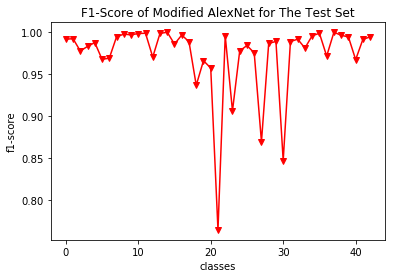

In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# plot f1 scores
path = './saved-salexnet-aug-eq-n/best-test-f1-scores.pkl'
with open(path, mode='rb') as f:
    score_list = pickle.load(f)
    classes = np.arange(43)
    plt.plot(classes, score_list, marker='v', color='red')
    plt.title('F1-Score of Modified AlexNet for The Test Set')
    plt.ylabel('f1-score')
    plt.xlabel('classes')
    plt.show()
    plt.close()